In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
def debug_imshow(image):
  fig = plt.figure(figsize=(4, 3), dpi=100)
  plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

In [3]:
model_path = 'model/face_detection_yunet_2022mar.onnx'
detector = cv.FaceDetectorYN.create(
  model_path, "",
  (320, 320), 0.9, 0.3, 5000
)


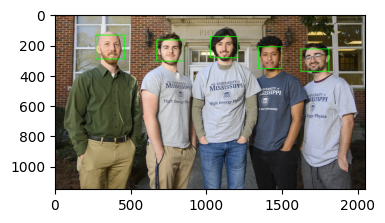

In [11]:
### with image

image_path = 'static/example-face-detection.jpg'
image = cv.imread(image_path)
img = cv.resize(image, (320, 320)) 

_, coords = detector.detect(img)

img_result = image.copy()
for coord in coords:
    x1, y1, w, h = coord[:4]
    x1 = x1*(image.shape[1]/320)
    y1 = y1*(image.shape[0]/320)
    w = w*(image.shape[1]/320)
    h = h*(image.shape[0]/320)

    color = (0, 255, 0)
    thickness = 3

    start_point = (int(x1), int(y1))
    end_point = (int(x1+w), int(y1+h))
    img_result = cv.rectangle(img_result, start_point, end_point, color, thickness)

img_result = cv.resize(img_result, (image.shape[1], image.shape[0]))
# cv.imwrite('out.jpg', img_result)
debug_imshow(img_result)

In [5]:
### with video
video_path = 'static/video-1.mp4'
cap = cv.VideoCapture(video_path)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    frame_input = cv.resize(frame, (320, 320))
    frame_output = frame.copy()
    _, faces = detector.detect(frame_input)

    if faces is not None:
        for coord in faces:
            x1, y1, w, h, x2, y2, x3, y3 = coord[:8]

            x1 = x1*(frame.shape[1]/320)
            y1 = y1*(frame.shape[0]/320)
            x2 = x2*(frame.shape[1]/320)
            y2 = y2*(frame.shape[0]/320)
            x3 = x3*(frame.shape[1]/320)
            y3 = y3*(frame.shape[0]/320)
            w = w*(frame.shape[1]/320)
            h = h*(frame.shape[0]/320)

            color = (0, 255, 0)
            thickness = 2
            radius = 2

            start_point = (int(x1), int(y1))
            end_point = (int(x1+w), int(y1+h))
            cv.rectangle(frame_output, start_point, end_point, color, thickness)

            center_point = (int(x2), int(y2))
            cv.circle(frame_output, center_point, radius, (255, 0, 0), thickness)
            center_point = (int(x3), int(y3))
            cv.circle(frame_output, center_point, radius, (255, 0, 0), thickness)

    frame_output = cv.resize(frame_output, (frame.shape[1], frame.shape[0]))
    cv.imshow('Video', frame_output)

    if cv.waitKey(5) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

In [6]:
### with webcam
cap = cv.VideoCapture(0)
width = 600
height = 450
cap.set(cv.CAP_PROP_FRAME_WIDTH, width)
cap.set(cv.CAP_PROP_FRAME_HEIGHT,height)
cap.set(cv.CAP_PROP_FPS, 59)
cap.set(cv.CAP_PROP_FOURCC,cv.VideoWriter_fourcc(*'MJPG'))

while True:
    ret, frame = cap.read()
    if frame is None: continue

    if not ret:
        break

    frame_input = cv.resize(frame, (320, 320))
    frame_output = frame.copy()
    _, faces = detector.detect(frame_input)

    if faces is not None:
        for coord in faces:
            x1, y1, w, h, x2, y2, x3, y3 = coord[:8]

            x1 = x1*(frame.shape[1]/320)
            y1 = y1*(frame.shape[0]/320)
            x2 = x2*(frame.shape[1]/320)
            y2 = y2*(frame.shape[0]/320)
            x3 = x3*(frame.shape[1]/320)
            y3 = y3*(frame.shape[0]/320)
            w = w*(frame.shape[1]/320)
            h = h*(frame.shape[0]/320)

            color = (0, 255, 0)
            thickness = 2
            radius = 2

            start_point = (int(x1), int(y1))
            end_point = (int(x1+w), int(y1+h))
            cv.rectangle(frame_output, start_point, end_point, color, thickness)

            # center_point = (int(x2), int(y2))
            # cv.circle(frame_output, center_point, radius, (255, 0, 0), thickness)
            # center_point = (int(x3), int(y3))
            # cv.circle(frame_output, center_point, radius, (255, 0, 0), thickness)

    frame_output = cv.resize(frame_output, (frame.shape[1], frame.shape[0]))
    cv.imshow('Video', frame_output)

    if cv.waitKey(5) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()